In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## Resampling

In [2]:
df = pd.read_csv('../chemical-concentration-readings.csv')
print('Shape of the dataset:', df.shape)
df.head(10)

Shape of the dataset: (197, 2)


,Timestamp,Chemical conc.
0,1975-01-01 00:00:00,17.0
1,1975-01-01 02:00:00,16.6
2,1975-01-01 04:00:00,16.3
3,1975-01-01 06:00:00,16.1
4,1975-01-01 08:00:00,17.1
5,1975-01-01 10:00:00,16.9
6,1975-01-01 12:00:00,16.8
7,1975-01-01 14:00:00,17.4
8,1975-01-01 16:00:00,17.1
9,1975-01-01 18:00:00,17.0


In [5]:
df.index = pd.to_datetime(df['Timestamp'], format = '%Y-%m-%d %H:%M:%S')
df.head(10)

,Timestamp,Chemical conc.
Timestamp,,
1975-01-01 00:00:00,1975-01-01 00:00:00,17.0
1975-01-01 02:00:00,1975-01-01 02:00:00,16.6
1975-01-01 04:00:00,1975-01-01 04:00:00,16.3
1975-01-01 06:00:00,1975-01-01 06:00:00,16.1
1975-01-01 08:00:00,1975-01-01 08:00:00,17.1
1975-01-01 10:00:00,1975-01-01 10:00:00,16.9
1975-01-01 12:00:00,1975-01-01 12:00:00,16.8
1975-01-01 14:00:00,1975-01-01 14:00:00,17.4
1975-01-01 16:00:00,1975-01-01 16:00:00,17.1


In [6]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [7]:
daily = df['Chemical conc.'].resample('D')
daily_mean = daily.mean()

In [8]:
daily_mean

Timestamp
1975-01-01    16.866667
1975-01-02    17.258333
1975-01-03    17.458333
1975-01-04    17.416667
1975-01-05    17.033333
1975-01-06    17.150000
1975-01-07    16.833333
1975-01-08    16.516667
1975-01-09    16.783333
1975-01-10    16.750000
1975-01-11    17.133333
1975-01-12    16.750000
1975-01-13    17.050000
1975-01-14    17.125000
1975-01-15    17.266667
1975-01-16    17.408333
1975-01-17    17.540000
Freq: D, Name: Chemical conc., dtype: float64

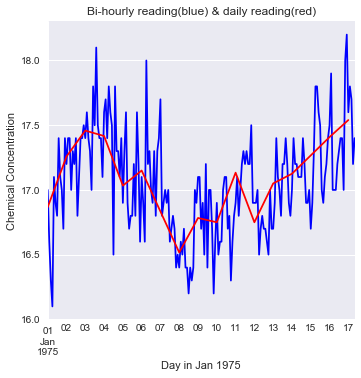

In [9]:
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(1, 1, 1)
df['Chemical conc.'].plot(ax = ax, color='b')
daily_mean.plot(ax = ax, color='r')

ax.set_title('Bi-hourly reading(blue) & daily reading(red)')
ax.set_xlabel('Day in Jan 1975')
ax.set_ylabel('Chemical Concentration')

## Group wise aggregation

In [10]:
temp_mean = pd.read_csv('../mean-daily-temperature-fisher-river.csv', parse_dates ={'date': [0]})

In [11]:
temp_mean.set_index('date', inplace=True)

In [12]:
temp_mean.head(10)

,Mean temparature
date,
1988-01-01,-23.00
1988-01-02,-20.50
1988-01-03,-22.00
1988-01-04,-30.50
1988-01-05,-31.00
1988-01-06,-27.50
1988-01-07,-26.25
1988-01-08,-26.50
1988-01-09,-23.00


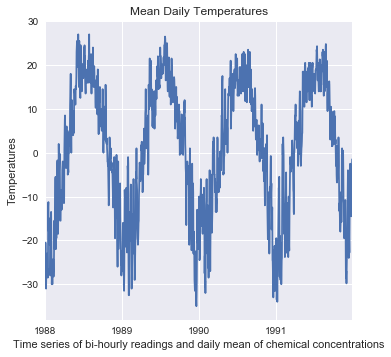

In [13]:
plt.figure(figsize = (5.5, 5.5))
temp_mean['Mean temparature'].plot()
plt.title('Mean Daily Temperatures')
plt.xlabel('Time series of bi-hourly readings and daily mean of chemical concentrations')
plt.ylabel('Temperatures')
plt.show()

In [14]:
temp_mean['Month_Year'] = temp_mean.index.map(lambda d: d.strftime('%m-%Y'))

In [15]:
temp_mean.head(10)

,Mean temparature,Month_Year
date,,
1988-01-01,-23.00,01-1988
1988-01-02,-20.50,01-1988
1988-01-03,-22.00,01-1988
1988-01-04,-30.50,01-1988
1988-01-05,-31.00,01-1988
1988-01-06,-27.50,01-1988
1988-01-07,-26.25,01-1988
1988-01-08,-26.50,01-1988
1988-01-09,-23.00,01-1988


In [16]:
monthly_stats = temp_mean.groupby(by = 'Month_Year')['Mean temparature'].agg([np.mean, np.median, np.std])
monthly_stats.reset_index(inplace = True)

In [17]:
monthly_stats.head(10)

,Month_Year,mean,median,std
0,01-1988,-22.137097,-23.00,5.260640
1,01-1989,-17.129032,-18.00,8.250725
2,01-1990,-15.112903,-12.00,6.606764
3,01-1991,-23.038710,-24.50,7.095570
4,02-1988,-19.025862,-19.50,8.598522
5,02-1989,-19.267857,-19.25,8.092042
6,02-1990,-17.482143,-16.50,8.018477
7,02-1991,-10.967857,-12.15,8.220753
8,03-1988,-8.258065,-9.25,5.341459
9,03-1989,-12.508065,-9.50,8.289925


In [18]:
monthly_stats['Year'] = monthly_stats['Month_Year'].map(lambda d: pd.to_datetime(d, format='%m-%Y').strftime('%Y'))
monthly_stats['Month'] = monthly_stats['Month_Year'].map(lambda m: pd.to_datetime(m, format = '%m-%Y').strftime('%m'))
monthly_stats.sort_values(by=['Year', 'Month'], inplace = True)
monthly_stats.head(10)

,Month_Year,mean,median,std,Year,Month
0,01-1988,-22.137097,-23.000,5.260640,1988,01
4,02-1988,-19.025862,-19.500,8.598522,1988,02
8,03-1988,-8.258065,-9.250,5.341459,1988,03
12,04-1988,2.641667,1.875,5.057720,1988,04
16,05-1988,11.290323,11.000,6.254364,1988,05
20,06-1988,19.291667,19.000,3.909032,1988,06
24,07-1988,19.048387,18.500,3.073692,1988,07
28,08-1988,17.379032,18.000,3.183205,1988,08
32,09-1988,10.675000,10.750,3.880294,1988,09
36,10-1988,2.467742,3.000,6.697245,1988,10


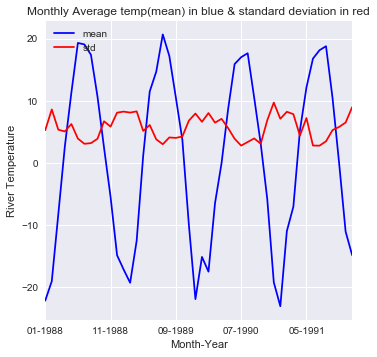

In [19]:
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(1, 1, 1)
monthly_stats.plot(x = 'Month_Year', y = 'mean',ax = ax, color='b')
monthly_stats.plot(x = 'Month_Year', y = 'std',ax = ax, color='r')
ax.set_title('Monthly Average temp(mean) in blue & standard deviation in red')
ax.set_xlabel('Month-Year')
ax.set_ylabel('River Temperature')
plt.legend(loc=2)

## Moving Statistics

In [20]:
weekly_moving_average = temp_mean['Mean temparature'].rolling(window = 7).mean()

`Calculating Monthly averages can be done as follows with a window size of thirty.`

In [21]:
monthly_moving_average = temp_mean['Mean temparature'].rolling(30).mean()

In [22]:
weekly_moving_average_2stride = temp_mean['Mean temparature'].rolling(window=7).mean()[::2]
monthly_moving_average_2stride = temp_mean['Mean temparature'].rolling(window=30).mean()[::2]

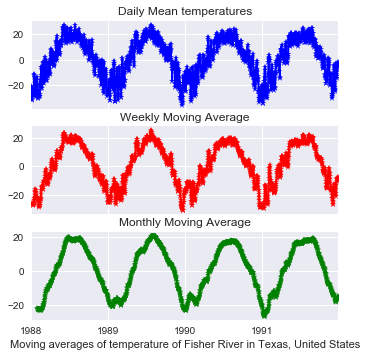

In [24]:
f, axarr = plt.subplots(3, sharex = True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('Daily Mean temperatures')
temp_mean['Mean temparature'].plot(linestyle='-', marker='*', color = 'b', ax = axarr[0])
axarr[1].set_title('Weekly Moving Average')
weekly_moving_average.plot(linestyle='-', marker='*', color = 'r', ax = axarr[1])
axarr[2].set_title('Monthly Moving Average')
monthly_moving_average.plot(linestyle='-', marker='*', color = 'g', ax = axarr[2])
axarr[2].set_xlabel('Moving averages of temperature of Fisher River in Texas, United States')

/home/aspiring1/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


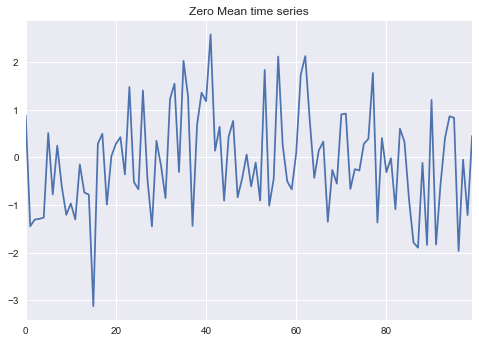

In [25]:
zero_mean_series = np.random.normal(0, 1, 100)
sns.tsplot(zero_mean_series)
plt.title('Zero Mean time series')
plt.show()